# 水蒸気ライダーデータ（複数ファイル）からqvの鉛直プロファイルを描く（z-t）

In [356]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pathlib import Path
import xarray as xr
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [357]:
#--- set parameters---------------------------------------
pd.set_option('display.max_rows', 50)
#time = pd.date_range('202107092200', '202107100000', freq='15T')
#time = pd.date_range('202107092300', '202107100100', freq='15T')
#time = pd.date_range('202107091200', '202107101200', freq='15T')
time = pd.date_range('202107091800', '202107100300', freq='15T') # for paper
#time = pd.date_range('202107090000', '202107102345', freq='15T') # for paper
#time = pd.date_range('202107092345', '202107100000', freq='15T')
lidar = 'Ko'
#lidar = 'Na'
rmiss = np.nan
dt = pd.Timedelta(minutes=15/2.0)
time

DatetimeIndex(['2021-07-09 18:00:00', '2021-07-09 18:15:00',
               '2021-07-09 18:30:00', '2021-07-09 18:45:00',
               '2021-07-09 19:00:00', '2021-07-09 19:15:00',
               '2021-07-09 19:30:00', '2021-07-09 19:45:00',
               '2021-07-09 20:00:00', '2021-07-09 20:15:00',
               '2021-07-09 20:30:00', '2021-07-09 20:45:00',
               '2021-07-09 21:00:00', '2021-07-09 21:15:00',
               '2021-07-09 21:30:00', '2021-07-09 21:45:00',
               '2021-07-09 22:00:00', '2021-07-09 22:15:00',
               '2021-07-09 22:30:00', '2021-07-09 22:45:00',
               '2021-07-09 23:00:00', '2021-07-09 23:15:00',
               '2021-07-09 23:30:00', '2021-07-09 23:45:00',
               '2021-07-10 00:00:00', '2021-07-10 00:15:00',
               '2021-07-10 00:30:00', '2021-07-10 00:45:00',
               '2021-07-10 01:00:00', '2021-07-10 01:15:00',
               '2021-07-10 01:30:00', '2021-07-10 01:45:00',
               '2021-07-

In [358]:
#---read WVL data by pandas------------------------
dlist = []
keys = []
for t in time:
    ymdh  = t.strftime('%Y/%m/%d/%H/')
    ymdhm = t.strftime('%y%m%d%H%M')
    #f = '../data/MRI_VAPOR/2021/07/09/23/Ko2107092345mgd.txt'
    f = '../data/MRI_VAPOR/' + ymdh + lidar + ymdhm + 'mgd.txt'
#    print(f)
    t2 = t + dt
    keys.append(t2)
    
    is_file = os.path.isfile(f)
#    print(is_file)
    if is_file:
        print(f"{f} exists and is a file.")
        df0 = pd.read_table(f, sep='\s+', header=2, index_col=0)
        df0 = df0.replace([-9.990000e+02], rmiss)
        df0
        #t = pd.to_datetime("202107092330") + pd.Timedelta(minutes=dt)
        dlist.append(df0)
    else:
        # 読み込むファイルのうち一番最初のファイルは存在しているに場合のみ対応している。
        df1 = df0.copy()
        df1[:] = rmiss # ファイルが存在しなければ、-999.90を代入する
#        df1[:] = -999.90 # ファイルが存在しなければ、-999.90を代入する
        dlist.append(df1) 
        print(f"{f} does not exiest or is not a file.")
#    print(t2)    

../data/MRI_VAPOR/2021/07/09/18/Ko2107091800mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/18/Ko2107091815mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/18/Ko2107091830mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/18/Ko2107091845mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/19/Ko2107091900mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/19/Ko2107091915mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/19/Ko2107091930mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/19/Ko2107091945mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/20/Ko2107092000mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/20/Ko2107092015mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/20/Ko2107092030mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/20/Ko2107092045mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/21/Ko2107092100mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/21/Ko2107

## pandas dataframe MultiIndexの作成
* 指定した軸の方向にDataFrameを結合するPandasのconcat関数の使い方
  * https://deepage.net/features/pandas-concat.html
    * 「元のデータの判別にラベルをつける」の部分を参考にした

In [359]:
df = pd.concat(dlist, keys=keys, names=["TIME", "LEV"]) # MultiIndexの作成
#    df = pd.concat([df0, df1], keys=[t0, t1], names=["TIME", "LEV"]) # MultiIndexの作成
df

W[g/kg]  dW[g/kg]     R355    dR355   T[K]  \
TIME                LEV                                                   
2021-07-09 18:07:30 0.19237    16.78    0.4797  0.05511  0.01585  286.9   
                    0.26732    16.07    0.4000  0.13450  0.03848  286.4   
                    0.34227    16.43    0.3690  0.26160  0.07449  285.9   
                    0.41721    16.40    0.3486  0.44260  0.12580  285.4   
                    0.49216    16.09    0.3489  0.62500  0.17740  284.9   
...                              ...       ...      ...      ...    ...   
2021-07-10 03:07:30 9.22362      NaN       NaN      NaN      NaN    NaN   
                    9.37351      NaN       NaN      NaN      NaN    NaN   
                    9.52341      NaN       NaN      NaN      NaN    NaN   
                    9.67331      NaN       NaN      NaN      NaN    NaN   
                    9.82320      NaN       NaN      NaN      NaN    NaN   

                             RO[gm^-3]   PZ^2_355  Wsonde[g/kg]  dWsonde[g/kg]  
TIME                LEV                                                         
2021-07-09 18:07:30 0.19237      1.202   1146.523           0.0            0.0  
                    0.26732      1.194   2710.107           0.0            0.0  
                    0.34227      1.185   5134.356           0.0            0.0  
                    0.41721      1.176   8493.468           0.0            0.0  
                    0.49216      1.168  11742.950           0.0            0.0  
...                                ...        ...           ...            ...  
2021-07-10 03:07:30 9.22362        NaN        NaN           NaN            NaN  
                    9.37351        NaN        NaN           NaN            NaN  
                    9.52341        NaN        NaN           NaN            NaN  
                    9.67331        NaN        NaN           NaN            NaN  
                    9.82320        NaN        NaN           NaN            NaN  

[2627 rows x 9 columns]

In [360]:
#---解析: uncertainty(a)の算出、及びaを用いて品質管理した水蒸気混合比w2の算出（2つの変数はdfに格納する）
rmiss = np.nan
df = df.replace([-9.990000e+02], rmiss) # 欠損値-999.0をNANに置き換える
w  = df['W[g/kg]']
dw = df['dW[g/kg]']
a = dw/w * 100
df['uncertainty[%]'] = a
a_th = 30.0 # (%)
#rmiss = -999.0
df['W2[g/kg]'] = df['W[g/kg]'].mask(a>a_th, rmiss) # a が30%を超える場合、wにNANを入力しw2としてdfに格納
df
#df['W2[g/kg]'] 

W[g/kg]  dW[g/kg]     R355    dR355   T[K]  \
TIME                LEV                                                   
2021-07-09 18:07:30 0.19237    16.78    0.4797  0.05511  0.01585  286.9   
                    0.26732    16.07    0.4000  0.13450  0.03848  286.4   
                    0.34227    16.43    0.3690  0.26160  0.07449  285.9   
                    0.41721    16.40    0.3486  0.44260  0.12580  285.4   
                    0.49216    16.09    0.3489  0.62500  0.17740  284.9   
...                              ...       ...      ...      ...    ...   
2021-07-10 03:07:30 9.22362      NaN       NaN      NaN      NaN    NaN   
                    9.37351      NaN       NaN      NaN      NaN    NaN   
                    9.52341      NaN       NaN      NaN      NaN    NaN   
                    9.67331      NaN       NaN      NaN      NaN    NaN   
                    9.82320      NaN       NaN      NaN      NaN    NaN   

                             RO[gm^-3]   PZ^2_355  Wsonde[g/kg]  \
TIME                LEV                                           
2021-07-09 18:07:30 0.19237      1.202   1146.523           0.0   
                    0.26732      1.194   2710.107           0.0   
                    0.34227      1.185   5134.356           0.0   
                    0.41721      1.176   8493.468           0.0   
                    0.49216      1.168  11742.950           0.0   
...                                ...        ...           ...   
2021-07-10 03:07:30 9.22362        NaN        NaN           NaN   
                    9.37351        NaN        NaN           NaN   
                    9.52341        NaN        NaN           NaN   
                    9.67331        NaN        NaN           NaN   
                    9.82320        NaN        NaN           NaN   

                             dWsonde[g/kg]  uncertainty[%]  W2[g/kg]  
TIME                LEV                                               
2021-07-09 18:07:30 0.19237            0.0        2.858760     16.78  
                    0.26732            0.0        2.489110     16.07  
                    0.34227            0.0        2.245892     16.43  
                    0.41721            0.0        2.125610     16.40  
                    0.49216            0.0        2.168428     16.09  
...                                    ...             ...       ...  
2021-07-10 03:07:30 9.22362            NaN             NaN       NaN  
                    9.37351            NaN             NaN       NaN  
                    9.52341            NaN             NaN       NaN  
                    9.67331            NaN             NaN       NaN  
                    9.82320            NaN             NaN       NaN  

[2627 rows x 11 columns]

In [361]:
#df.describe()

In [362]:
zmin = 0; zmax = 2.03
t1 = "2021-07-09T1800"; t2 = "2021-07-10T0300"
#t1 = "2021-07-09T0000"; t2 = "2021-07-10T2359"
ds = df.to_xarray()
qv_org = ds['W[g/kg]'].sel(LEV=slice(zmin, zmax)).sel(TIME=slice(t1,t2))
qv     = ds['W2[g/kg]'].sel(LEV=slice(zmin, zmax)).sel(TIME=slice(t1,t2))
T  = ds['T[K]'].sel(LEV=slice(zmin, zmax)).sel(TIME=slice(t1,t2))
PZ = ds['PZ^2_355'].sel(LEV=slice(zmin, zmax)).sel(TIME=slice(t1,t2))

In [363]:
#cmap = 'rainbow'
cmap = 'jet'
vmin = 10; vmax = 20

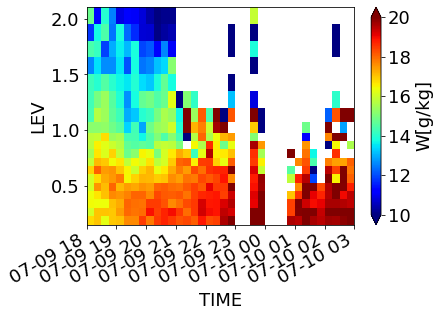

In [364]:
# 品質管理前
qv_org.transpose("LEV", "TIME").plot(vmin=vmin, vmax=vmax, cmap=cmap)

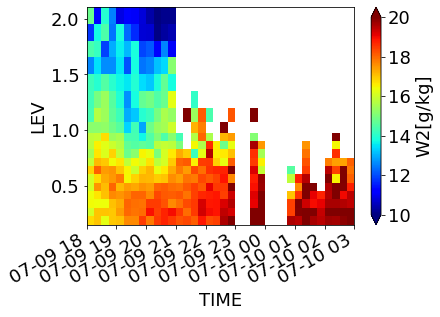

In [365]:
# 品質管理後
qv.transpose("LEV", "TIME").plot(vmin=vmin, vmax=vmax, cmap=cmap)

fig_vaporlidar_multi_qv_z-t.png


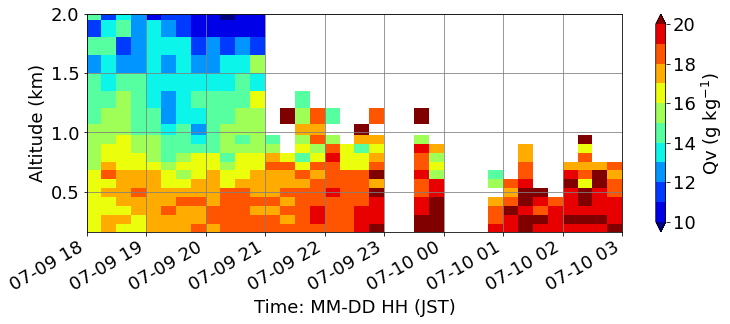

In [366]:
#---図の設定-------------
fs = 18
plt.rcParams["font.size"]   = fs
#plt.rcParams["font.family"] = "fontname"
cmap = 'jet'

#---プロット領域の作成-----------
xx=12; yy=4
fig = plt.figure(figsize=(xx,yy))
ax = fig.add_subplot(1, 1, 1)

#---シェードを描く----------------------
vmin = 10; vmax = 20; levels = vmax - vmin + 1
#label = 'Water vapor mixing ratio (g kg$^{-1}$)'
label = 'Qv (g kg$^{-1}$)'
qv.transpose("LEV", "TIME").plot(ax=ax,vmin=vmin, vmax=vmax, cmap=cmap, levels=levels,cbar_kwargs={'label':label})

#vmin2 = 0; vmax2 = 5
#np.log10(PZ).transpose("LEV", "TIME").plot(ax=ax,vmin=vmin2, vmax=vmax2, cmap=cmap, levels=levels)

#----タイトル・ラベル等の設定
#plt.title("WVL ("+lidar+")")
plt.title("")
plt.ylabel("Altitude (km)")
plt.xlabel("Time: MM-DD HH (JST)")
plt.grid(which='major',color='gray',linestyle='-')

#----可視化範囲を陽に設定
t1 = "2021-07-09T1800"; t2 = "2021-07-10T0300"
tt1 = pd.to_datetime(t1)
tt2 = pd.to_datetime(t2)
ax.set_xlim([tt1,tt2])
zmin = 0.1625; zmax = 2
#zmin = 0; zmax = 2
ax.set_ylim([zmin,zmax])

#------------------------------------
# 図のファイルへの書き出し
#from pathlib import Path
#exe = Path().resolve().split(".")[0] #.replace("draw", "")
#exe = os.path.basename(__file__).split(".")[0] #.replace("draw", "")
fig_name = "fig_vaporlidar_multi_qv_z-t.png"
#fig_name = "fig_" + exe + ".png"
print(fig_name)
plt.savefig(fig_name, dpi=300, bbox_inches='tight')
plt.show()